#1. 다층신경망과 Backpropagation 알고리즘


###1.1 Logical XOR

In [ ]:
import numpy as np
import matplotlib.pylab as plt

np.random.seed(2022)

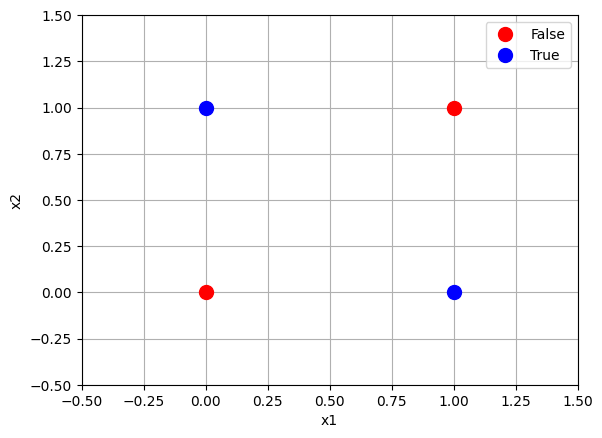

In [ ]:
#################### Logical XOR ####################
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

plt.plot(X[0::3, 0], X[0::3, 1], 'r.', markersize=20, label = "False")
plt.plot(X[1:3, 0], X[1:3, 1], 'b.', markersize=20, label = "True")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

### [복습] **시그모이드** 활성화 함수를 통한 분류기

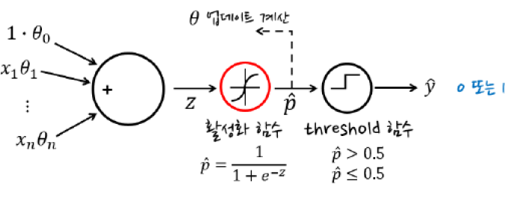

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
def binary_classifier_logistic(x, theta):
  z = x.dot(theta)
  p_hat = sigmoid(z)
  y_hat = (p_hat >= 0.5).astype(int)
  return y_hat

In [ ]:
X_ = np.c_[np.ones(X.shape[0]), X]
print("X_ : ")
print(X_)
print("Y : ")
print(Y)

X_ : 
[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]
Y : 
[[0]
 [1]
 [1]
 [0]]


In [ ]:
eta = 0.1
n_iterations = 1000
(m, n) = X_.shape # m : num of data / n : dim of data
theta = np.random.randn(n,1)

J_hist = []
for iteration in range(n_iterations):
  P_hat = sigmoid(X_.dot(theta))
  gradients = 2/m * X_.T.dot(P_hat - Y)
  theta = theta - eta * gradients

In [ ]:
Y_hat = binary_classifier_logistic(X_, theta)
print(sigmoid(X_.dot(theta).T))
print(Y_hat.T)
print(Y.T)

[[0.50001367 0.5000022  0.50000209 0.49999062]]
[[1 1 1 0]]
[[0 1 1 0]]


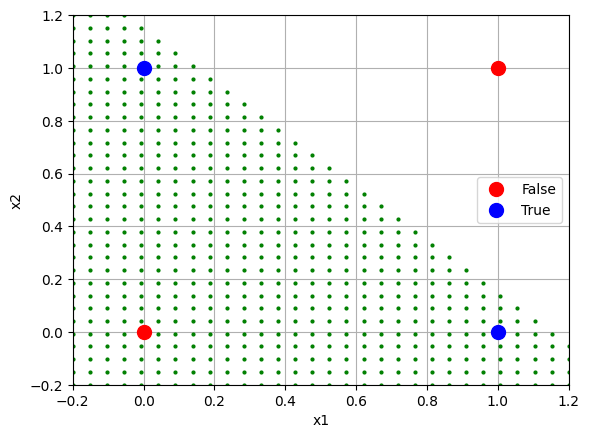

In [ ]:
num_of_samples = 30
(m, n) = X_.shape # m : num of data / n : dim of data

x1_min = -0.2
x1_max = 1.2
x2_min = -0.2
x2_max = 1.2

x1 = np.linspace(x1_min, x1_max, num_of_samples)
x2 = np.linspace(x2_min, x2_max, num_of_samples)

X_new = np.ones((num_of_samples**2 , n))
for i in range(num_of_samples):
  for j in range(num_of_samples):
    X_new[i*num_of_samples + j, 0] = 1
    X_new[i*num_of_samples + j, 1] = x1[i]
    X_new[i*num_of_samples + j, 2] = x2[j]

Y_hat = binary_classifier_logistic(X_new, theta)
Y_hat = np.reshape(Y_hat, (num_of_samples**2))
plt.plot(X_new[Y_hat == 1][:, 1], X_new[Y_hat == 1][:, 2], 'g.', markersize = 4)

idx1 = np.where(X_new[Y_hat == 1][:, 1] == min(X_new[Y_hat == 1][:, 1]))[0][0]
idx2 = np.where(X_new[Y_hat == 1][:, 1] == max(X_new[Y_hat == 1][:, 1]))[0][0]
plt.plot([X_new[Y_hat == 1][:, 1][idx1], X_new[Y_hat == 1][:, 2][idx1]], [X_new[Y_hat == 1][:, 2][idx1], X_new[Y_hat == 1][:, 1][idx1]], 'r--')

plt.plot(X[0::3, 0], X[0::3, 1], 'r.', markersize=20, label = "False")
plt.plot(X[1:3, 0], X[1:3, 1], 'b.', markersize=20, label = "True")

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

### 1.2 Two Layer Classifier

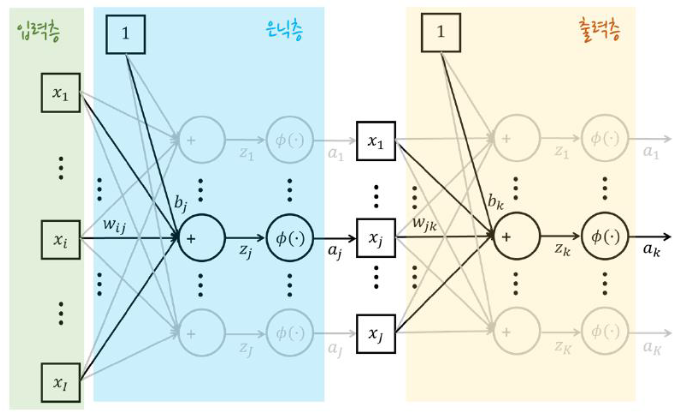

> Q. XOR 연산에 사용되는 데이터의 차원은 어떻게 되는가? 2

> Q. 첫번째 은닉층의 theta의 차원은 어떻게 되어야 할까?  (노드 개수 3개) (2,3)

> Q. 첫번째 은닉층의 Bias의 개수는 누구와 같을까? 은닉층의 노드

> Q. 첫번째 은닉층의 결과 a는 차원이 어떻게 될까? 3개

연산의 이해를 돕기 위해 먼저 **하나의 데이터**로만 계산을 진행해보자.

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

In [ ]:
X_1 = X[0, :]

In [ ]:
################## Fill Your Code! ##################
W1 = np.random.randn(2, 3);
b1 = np.random.randn(1, 3);
z1 = X_1.dot(W1) + b1
a1 = sigmoid(z1)
#####################################################
print(W1.shape)
print(b1.shape)
print(z1.shape)
print(a1.shape)


(2, 3)
(1, 3)
(1, 3)
(1, 3)


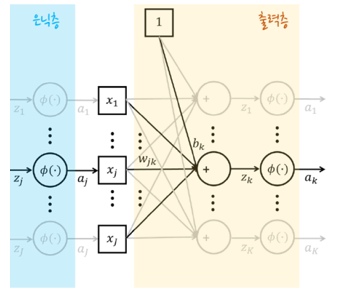

> Q. 출력층에 들어가는 입력의 차원은 어떻게 될까? 3개

> Q. 출력층의 결과는 몇개가 나와야 할까? (출력층 노드의 수) 1개

> Q. 출력층의 theta의 차원은 어떻게 되어야 할까? (3, 1)

> Q. 출력층의 Bias의 개수는 누구와 같을까? 출력층 노드 수 1개

In [ ]:
################## Fill Your Code! ##################
W2 = np.random.randn(3, 1);
b2 = np.random.randn(1, 1);
z2 = a1.dot(W2) + b2
a2 = sigmoid(z2)
#####################################################
print(W2.shape)
print(b2.shape)
print(z2.shape)
print(a2.shape)

# 최종 결과 출력
print(a2)

(3, 1)
(1, 1)
(1, 1)
(1, 1)
[[0.70746348]]


하나의 데이터에 계산한 결과를 확인 하였으니, 전체 데이터에 대하여 계산해보자.

> Q) 데이터 4개에 대한 결과의 차원은 어떻게 될까? (4, 1)


In [ ]:
################## Fill Your Code! ##################
# hint : W1  b1  W2  b2
z1 = X.dot(W1) + b1
a1 = sigmoid(z1)
z2 = a1.dot(W2) + b2
a2 = sigmoid(z2)
#####################################################
Y_hat = a2
print(Y_hat)

[[0.70746348]
 [0.67430534]
 [0.7441834 ]
 [0.69920277]]


### 1.3 Backpropagation & Gradient Descent Rule

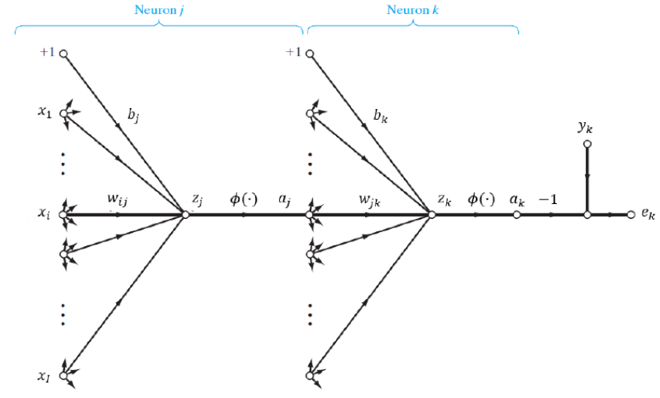

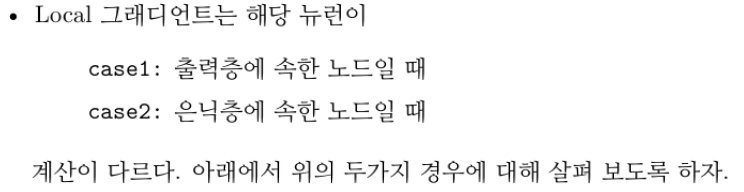



> Case1 : 출련층에 속한 노드일 때



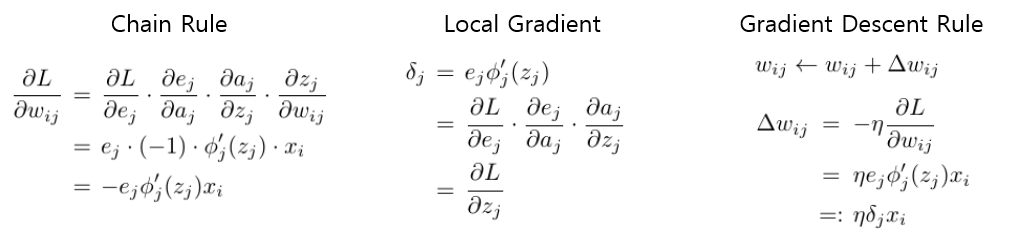

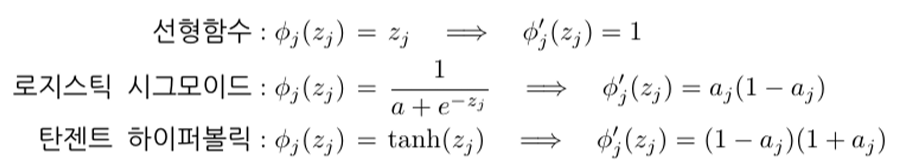

In [ ]:
#####################################################
########### 출력층에서의 Backpropagation ############
################## Fill Your Code! ##################
# hint : Y   Y_hat
# dL/de : (4, 1)
dLde = Y - Y_hat

# de/da2 : (4, 1)
deda2 = -1*np.ones((4, 1))

# da2/dz2 : (4, 1)
da2dz2 = a2*(1-a2)

# dz2/dW2 : (4, 3)
dz2dW2 = a1

# dz2/db2 : (4, 1)
dz2db2 = np.ones((4, 1))

# local gradient : (4, 1)
delta2 = dLde*deda2*da2dz2
delta2 = -1*delta2

# dL/dW2 : (3, 1)
dLdW2 = dz2dW2.T.dot(delta2)
# dL/db2 : (1, 1)
dLdb2 = dz2db2.T.dot(delta2)

# Gradient Descent Rule
eta = 0.01
W2 = W2 + eta*dLdW2
b2 = b2 + eta*dLdb2
#####################################################



> Case2 : 은닉층에 속한 노드일 때



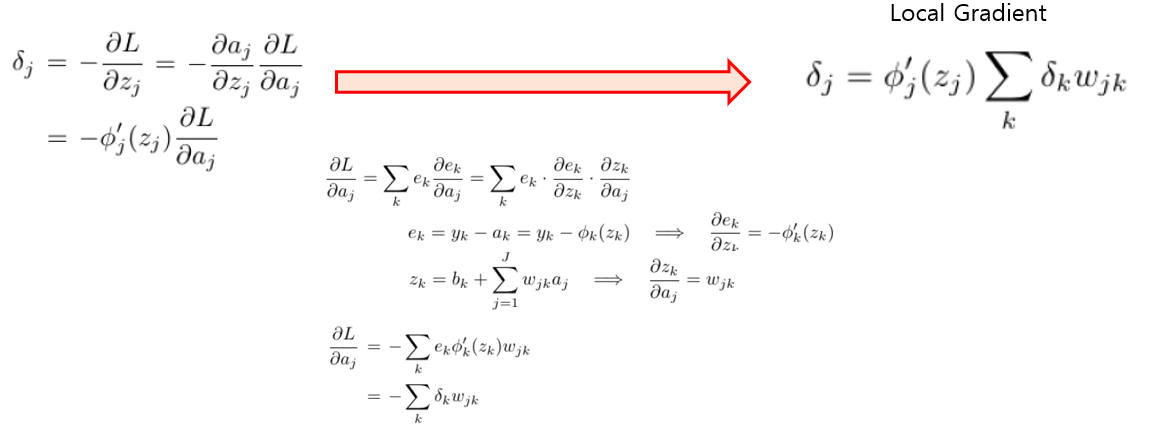

In [ ]:
#####################################################
########### 은닉층에서의 Backpropagation ############
################## Fill Your Code! ##################
# da1/dz1 : (4, 3)
da1dz1 = a1*(1-a1)

# local gradient : (4, 3)
delta1 = da1dz1 * delta2.dot(W2.T)

# dz1/dW1 : (4, 2)
dz1dW1 = X

# dz1/db1 : (4, 1)
dz1db1 = np.ones((4, 1))

# dL/dW1 : (2, 3)
dLdW1 = dz1dW1.T.dot(delta1)
# dL/db1 : (1, 3)
dLdb1 = dz1db1.T.dot(delta1)

# Gradient Descent Rule
eta = 0.01
W1 = W1 + eta*dLdW1
b1 = b1 + eta*dLdb1
#####################################################

앞에서부터 코딩한 것과 같이, backpropagation을 하기 위해서는 먼저 forward를 통해 y_hat을 구하고 error를 계산해 주어야 한다.

위에서 구현한 forward, backward 작업을 iterative하게 구현해 보도록 하자.

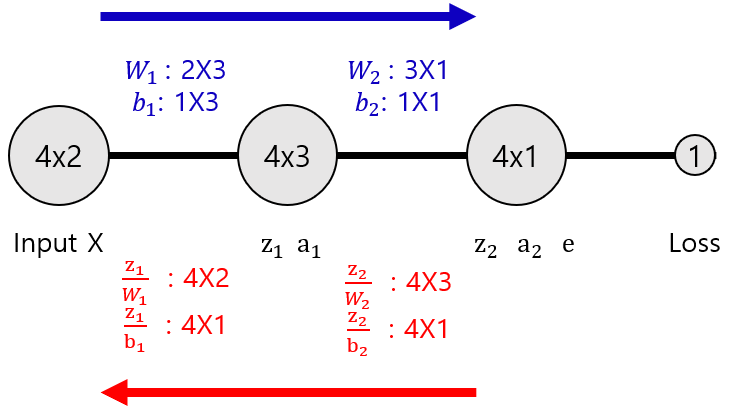

In [ ]:
np.random.seed(2022)
W1 = np.random.randn(2, 3);
b1 = np.random.randn(1, 3);
W2 = np.random.randn(3, 1);
b2 = np.random.randn(1, 1);

n_iterations = 10000
eta = 0.1
for iteration in range(n_iterations):
    ##################################################
    #       순전파, 손실 계산, 역전파 수행하기       #
    ##################################################
    # Forward
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)
    Y_hat = a2

    # MSE
    e = Y - Y_hat
    loss = 1/4*(e**2).sum()

    # Backward
    dLde = e
    deda2 = -1*np.ones((4, 1))
    da2dz2 = a2*(1-a2)

    dz2dW2 = a1
    dz2db2 = np.ones((4, 1))
    delta2 = dLde*deda2*da2dz2
    delta2 = -1*delta2
    dLdW2 = dz2dW2.T.dot(delta2)
    dLdb2 = dz2db2.T.dot(delta2)

    da1dz1 = a1*(1-a1)
    delta1 = da1dz1 * delta2.dot(W2.T)
    dz1dW1 = X
    dz1db1 = np.ones((4, 1))
    dLdW1 = dz1dW1.T.dot(delta1)
    dLdb1 = dz1db1.T.dot(delta1)

    # Gradient Descent Rule
    W2 = W2 + eta*dLdW2
    b2 = b2 + eta*dLdb2
    W1 = W1 + eta*dLdW1
    b1 = b1 + eta*dLdb1

    ##################################################
    #                  코드 작성 끝                  #
    ##################################################

print("After Learning")
print("Y_hat")
print(Y_hat)
print("loss")
print(loss)

After Learning
Y_hat
[[0.02728225]
 [0.95020931]
 [0.95949416]
 [0.05827573]]
loss
0.002065054644362411


In [ ]:
# Result
print((Y_hat >= 0.5).astype(int).T[0])

[0 1 1 0]


Visualization

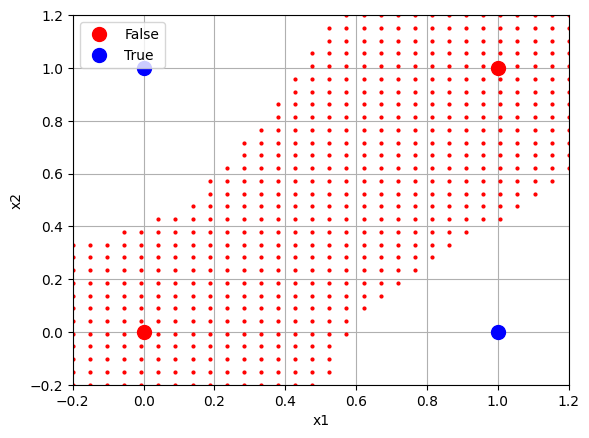

In [ ]:
def forward(X, W1, b1, W2, b2):
  z1 = X.dot(W1) + b1
  a1 = sigmoid(z1)
  z2 = a1.dot(W2) + b2
  a2 = sigmoid(z2)
  Y_hat = a2
  return Y_hat

num_of_samples = 30
(m, n) = X.shape # m : num of data / n : dim of data

x1_min = -0.2
x1_max = 1.2
x2_min = -0.2
x2_max = 1.2

x1 = np.linspace(x1_min, x1_max, num_of_samples)
x2 = np.linspace(x2_min, x2_max, num_of_samples)

X_new = np.ones((num_of_samples**2 , n))
for i in range(num_of_samples):
  for j in range(num_of_samples):
    X_new[i*num_of_samples + j, 0] = x1[i]
    X_new[i*num_of_samples + j, 1] = x2[j]

Y_hat = forward(X_new, W1, b1, W2, b2)
Y_hat = np.reshape((Y_hat >= 0.5).astype(int).T[0], (num_of_samples**2))
plt.plot(X_new[Y_hat == 0][:, 0], X_new[Y_hat == 0][:, 1], 'r.', markersize = 4)

plt.plot(X[0::3, 0], X[0::3, 1], 'r.', markersize=20, label = "False")
plt.plot(X[1:3, 0], X[1:3, 1], 'b.', markersize=20, label = "True")

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

# 2. 다층신경망을 사용한 Digit 분류

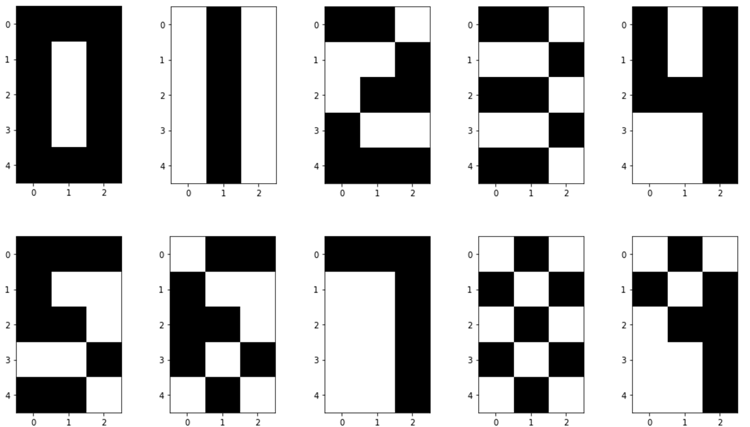

In [ ]:
D0 = np.array([[1, 1, 1],
               [1, 0, 1],
               [1, 0, 1],
               [1, 0, 1],
               [1, 1, 1]])
D1 = np.array([[0, 1, 0],
               [0, 1, 0],
               [0, 1, 0],
               [0, 1, 0],
               [0, 1, 0]])
D2 = np.array([[1, 1, 0],
               [0, 0, 1],
               [0, 1, 1],
               [1, 0, 0],
               [1, 1, 1]])
D3 = np.array([[1, 1, 0],
               [0, 0, 1],
               [1, 1, 0],
               [0, 0, 1],
               [1, 1, 0]])
D4 = np.array([[1, 0, 1],
               [1, 0, 1],
               [1, 1, 1],
               [0, 0, 1],
               [0, 0, 1]])
D5 = np.array([[1, 1, 1],
               [1, 0, 0],
               [1, 1, 0],
               [0, 0, 1],
               [1, 1, 0]])
D6 = np.array([[0, 1, 1],
               [1, 0, 0],
               [1, 1, 0],
               [1, 0, 1],
               [0, 1, 0]])
D7 = np.array([[1, 1, 1],
               [0, 0, 1],
               [0, 0, 1],
               [0, 0, 1],
               [0, 0, 1]])
D8 = np.array([[0, 1, 0],
               [1, 0, 1],
               [0, 1, 0],
               [1, 0, 1],
               [0, 1, 0]])
D9 = np.array([[0, 1, 0],
               [1, 0, 1],
               [0, 1, 1],
               [0, 0, 1],
               [0, 0, 1]])

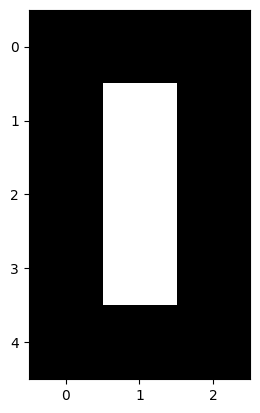

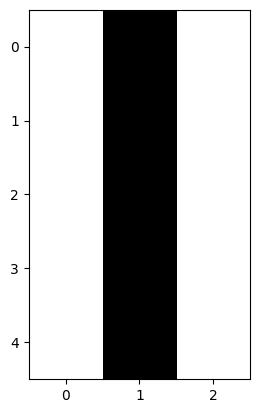

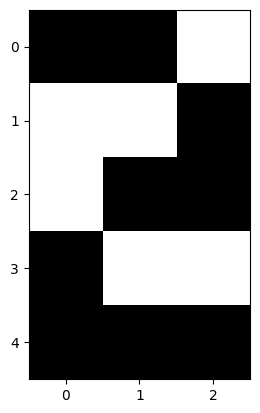

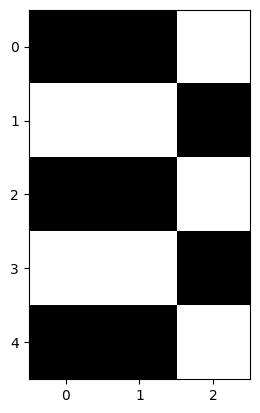

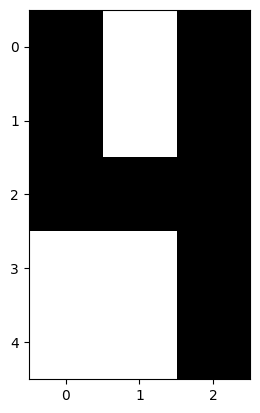

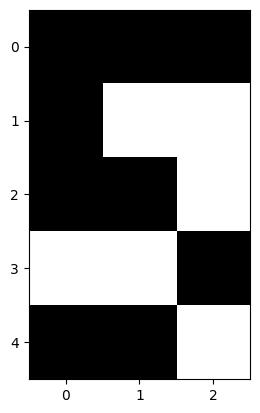

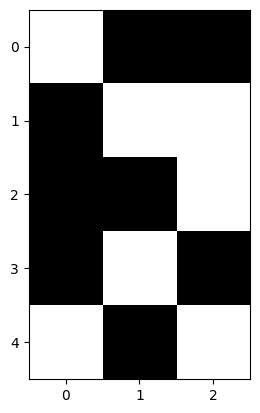

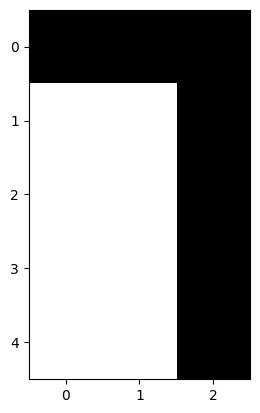

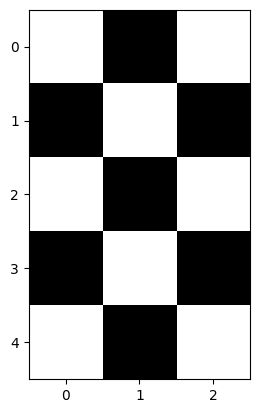

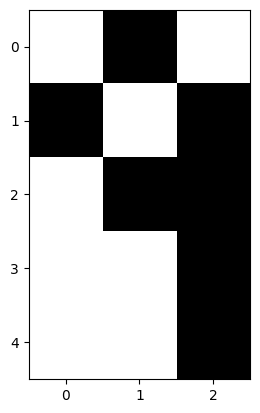

In [ ]:
X = np.array([D0, D1, D2, D3, D4, D5, D6, D7, D8, D9])
for x in X:
    # https://matplotlib.org/stable/api/pyplot_summary.html
    plt.imshow(x, cmap='gray_r')
    plt.show()

Y는 각 이미지에 대한 class(label)을 나타낸다.

> Q) 이 때, 멀티 클래스 분류를 위해 출력 데이터 y는 어떠한 형식으로 표현해야 할까? One hot encoding



> Q) 변화된 y_의 차원은 어떻게 될까? 1x10





In [ ]:
# https://stackoverflow.com/questions/65643248/one-hot-encoding-from-numpy
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [ ]:
# 각 x에 대한 Class
Y = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]])
Y_ = get_one_hot(Y.reshape(-1), Y.shape[0])

입력 데이터 x는 (5,3)의 형태를 가지고 있다.

이를 우리가 구현했던 다층 신경망의 입력으로 넣어주기 위해, 1차원 데이터로 표현해 주어야 한다.



> Q) 변화된 데이터 x의 차원은 어떻게 변해야 할까? 1x15



In [ ]:
X_ = X.reshape(X.shape[0], -1).copy()
X_.shape

(10, 15)

이제, 변환된 X_와 Y_를 사용하여 **신경망을 학습**해보자.

아래 표는 chain rule에서 이용되는 **편미분의 값**을 출력층과 은닉층으로 나누어 보여준다.

또한, **빨간색 글씨는 각 층에서의 local gradient**를 의미한다.

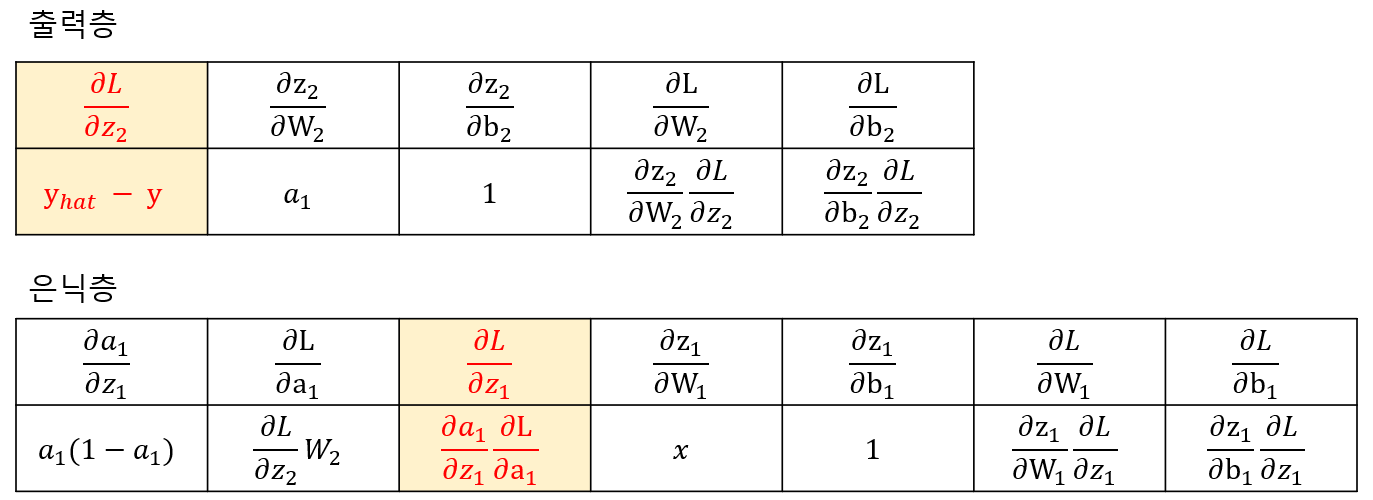

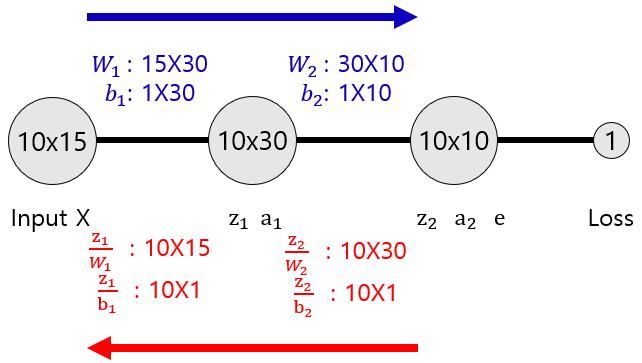

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html
from scipy.special import softmax
from sklearn.metrics import log_loss as cross_entropy_loss

In [ ]:
np.random.seed(2022)
W1 = np.random.randn(15, 30);
b1 = np.random.randn(1, 30);
W2 = np.random.randn(30, 10);
b2 = np.random.randn(1, 10);

N = X_.shape[0]
eta = 0.01
n_iterations = 30000
for iteration in range(n_iterations):
    ##################################################
    #       순전파, 손실 계산, 역전파 수행하기       #
    ##################################################
    # Forward
    z1 = X_.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    a2 = softmax(z2, axis=1)
    Y_hat = a2

    # Cross Entrophy Loss
    loss = cross_entropy_loss(Y_, Y_hat)

    # Backward
    delta2 = (Y_hat - Y_) / N                 # (10, 10)
    delta2 = -1*delta2                        # (10, 10)
    dz2dW2 = a1                               # (10, 30)
    dz2db2 = np.ones((10, 1))                 # (10, 1)
    dLdW2 = dz2dW2.T.dot(delta2)              # (30, 10) dot (10, 10) -> (30, 10)
    dLdb2 = dz2db2.T.dot(delta2)              # (1, 10) dot (10, 10) -> (1, 10)

    da1dz1 = a1*(1-a1)                        # (10, 30)
    delta1 = da1dz1 * delta2.dot(W2.T)        # (10, 30)
    dz1dW1 = X_                               # (10, 15)
    dz1db1 = np.ones((10, 1))                 # (10, 1)
    dLdW1 = dz1dW1.T.dot(delta1)              # (15, 30)
    dLdb1 = dz1db1.T.dot(delta1)              # (1, 30)

    # Gradient Descent Rule
    W2 = W2 + eta*dLdW2
    b2 = b2 + eta*dLdb2
    W1 = W1 + eta*dLdW1
    b1 = b1 + eta*dLdb1

    ##################################################
    #                  코드 작성 끝                  #
    ##################################################

print("After Learning")
print("Y_hat")
print(np.around(Y_hat, 1))
print("loss")
print(loss)

After Learning
Y_hat
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
loss
0.014923491347099702


In [ ]:
Y_hat.argmax(axis=1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

위와 같이 이미지 숫자 분류가 잘 되는 것을 확인할 수 있다.

이번에는 **실험 데이터**로 아래 그림을 사용해 보자.

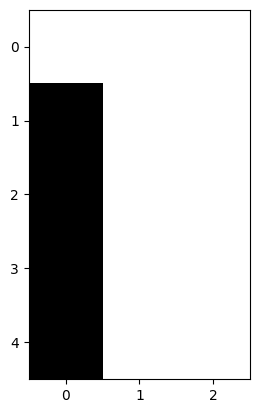

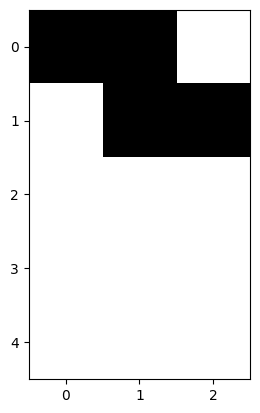

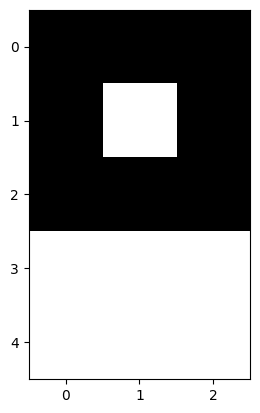

In [ ]:
T1 = np.array([[0, 0, 0],
               [1, 0, 0],
               [1, 0, 0],
               [1, 0, 0],
               [1, 0, 0]])

T2 = np.array([[1, 1, 0],
               [0, 1, 1],
               [0, 0, 0],
               [0, 0, 0],
               [0, 0, 0]])


T3 = np.array([[1, 1, 1],
               [1, 0, 1],
               [1, 1, 1],
               [0, 0, 0],
               [0, 0, 0]])

T = np.array([T1, T2, T3])
T_ = T.reshape(T.shape[0], -1).copy()

for t in T:
  plt.imshow(t, cmap='gray_r')
  plt.show()

In [ ]:
# forward
################## Fill Your Code! ##################
z1 = T_.dot(W1) + b1
a1 = sigmoid(z1)
z2 = a1.dot(W2) + b2
a2 = sigmoid(z2)
Y_hat = a2
#####################################################

In [ ]:
Y_hat.argmax(axis=1)

array([0, 3, 3])

위와 같이 조금 변형된 숫자에 대해서는 분류를 하지 못하는 것을 볼 수 있다.

다음 시간에는 이러한 문제를 해결하기 위해 고안된 **Convolutional Neural Network(CNN)**에 대하여 알아보자!